---
title: 2 - Why Jupyter Books?
subtitle: Evolve markdown documents and notebooks into structured data
license:
  code: MIT
---


In [1]:
import altair as alt
from vega_datasets import data

cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
).interactive()

alt.Chart(...)

In [2]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [3]:
plt.style.use('seaborn-v0_8')  
mpl.rcParams['font.family'] = 'serif'  
%config InlineBackend.figure_format = 'svg'

In [4]:
data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [5]:
data['rets'] = np.log(data / data.shift(1))  
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)  

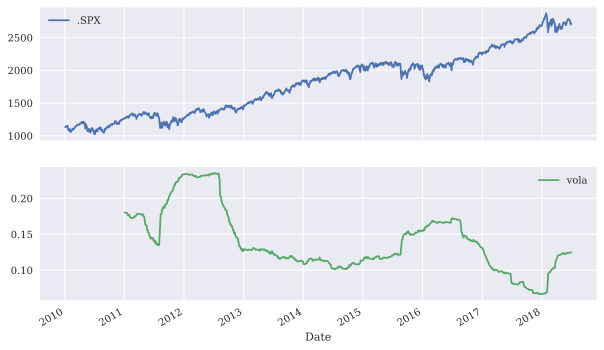

In [6]:
import matplotlib.pyplot as plt

data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6))
plt.show()


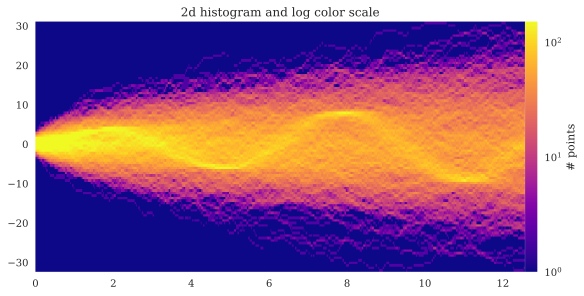

In [7]:

from copy import copy

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Make some data; a 1D random walk + small fraction of sine waves
num_series = 1000
num_points = 100
SNR = 0.10  # Signal to Noise Ratio
x = np.linspace(0, 4 * np.pi, num_points)
# Generate unbiased Gaussian random walks
Y = np.cumsum(np.random.randn(num_series, num_points), axis=-1)
# Generate sinusoidal signals
num_signal = int(round(SNR * num_series))
phi = (np.pi / 8) * np.random.randn(num_signal, 1)  # small random offset
Y[-num_signal:] = (
    np.sqrt(np.arange(num_points))[None, :]  # random walk RMS scaling factor
    * (np.sin(x[None, :] - phi)
       + 0.05 * np.random.randn(num_signal, num_points))  # small random noise
)


# Now we will convert the multiple time series into a histogram. Not only will
# the hidden signal be more visible, but it is also a much quicker procedure.
# Linearly interpolate between the points in each time series
num_fine = 800
x_fine = np.linspace(x.min(), x.max(), num_fine)
y_fine = np.empty((num_series, num_fine), dtype=float)
for i in range(num_series):
    y_fine[i, :] = np.interp(x_fine, x, Y[i, :])
y_fine = y_fine.flatten()
x_fine = np.matlib.repmat(x_fine, num_series, 1).flatten()



fig, axes = plt.subplots(figsize=(8, 4), constrained_layout=True)
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[400, 100])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmax=1.5e2), rasterized=True)
fig.colorbar(pcm, ax=axes, label="# points", pad=0)
axes.set_title("2d histogram and log color scale");

## Idioms & Paradigms

In [8]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

893 ms ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

63.4 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a license for Eikon. Therefore no code is provided.**

### AI-First Finance 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)

In [ ]:
lags = 6

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)
data.dropna(inplace=True)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(gamma='scale')  

In [ ]:
data['Prediction'] = model.predict(data[cols])  

In [ ]:
data['Strategy'] = data['Prediction'] * data['Returns']  

In [ ]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  